In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('C:/Assignments neostats/Wifi Data.xlsx')

The demand and usage of the internet is growing across the globe and public wifi is becoming a new normal as we move forward. 
Wifi providers want to optimize the cost while providing the free and paid wifi.

The use case here refers to public WiFi hotspots in New York City. Please refer to the dataset – Wifi Data.xlsx. 
The information comprises of records for every public WiFi hotspot (ones provided by or in partnership with the city) in New York City.

Using Python’s Pandas and Seaborn library to answer following business questions:
Get the data provided, check frequency distribution of the features, drop irrelevant and redundant features if any and state your inferences?

Using appropriate data visualization answer the following:
- Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?
- Plot providers vs number of free wifi hotspots.
- Are there any provider(s) who do not provide free wifi?
- Which Location type (Location_T) are most common and least common?
- How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.

In [5]:
df.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.65831,-73.94406,Outdoor,Brooklyn,3,BK60
1,2,BK,Limited Free,ALTICEUSA,40.65800,-73.94723,Outdoor,Brooklyn,3,BK60
2,3,BK,Limited Free,ALTICEUSA,40.65800,-73.94723,Outdoor,Brooklyn,3,BK60
3,4,BK,Limited Free,ALTICEUSA,40.65743,-73.94716,Outdoor,Brooklyn,3,BK60
4,5,BK,Limited Free,ALTICEUSA,40.65743,-73.94716,Outdoor,Brooklyn,3,BK60


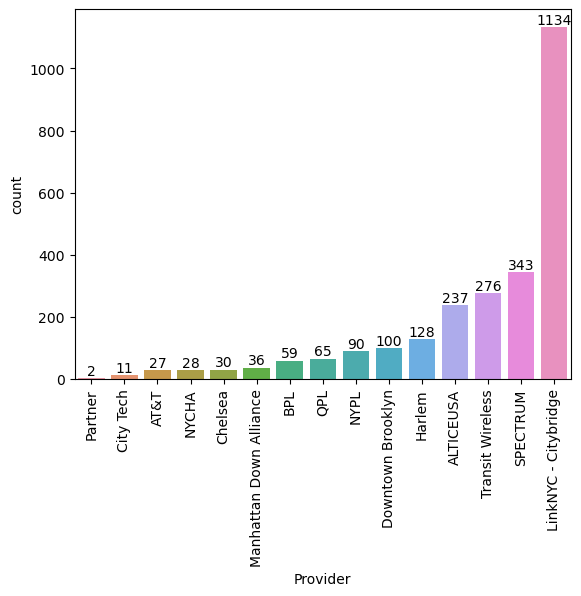

In [18]:
##Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?

ax=sns.countplot(data=df, x='Provider', order=df['Provider'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.xticks (rotation=90)
plt.show()

In [22]:
##Are there any provider(s) who do not provide free wifi?

df.groupby(['Provider','Type'])['OBJECTID'].count().to_frame()

OBJECTID
Provider                Type                  
ALTICEUSA               Limited Free       237
AT&T                    Free                26
                        Limited Free         1
BPL                     Free                59
Chelsea                 Free                30
City Tech               Free                11
Downtown Brooklyn       Free               100
Harlem                  Free               128
LinkNYC - Citybridge    Free              1134
Manhattan Down Alliance Free                36
NYCHA                   Free                28
NYPL                    Free                90
Partner                 Partner Site         2
QPL                     Free                65
SPECTRUM                Limited Free       343
Transit Wireless        Free               276

Partner doesnt provide free wifi. 

In [27]:
## Plot providers vs number of free wifi hotspots.

free_df=df[df['Type']=='Free']

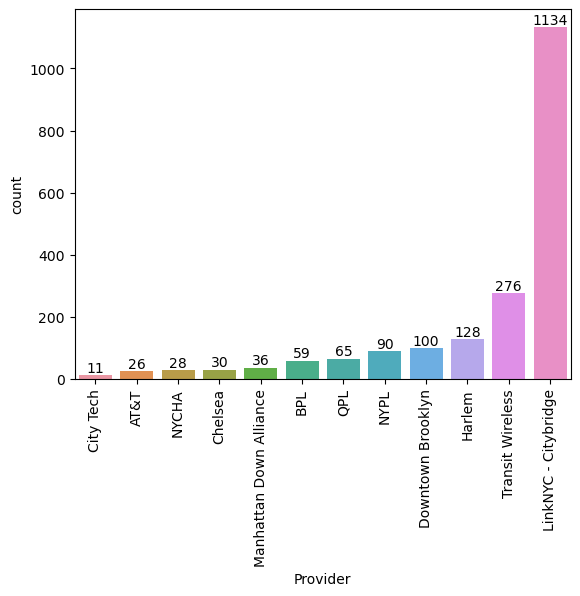

In [29]:
ax=sns.countplot(data=free_df, x='Provider', order=free_df['Provider'].value_counts(ascending=True).index)
ax.bar_label(ax.containers[0])
plt.xticks (rotation=90)
plt.show()

In [30]:
## Which Location type (Location_T) are most common and least common?

df['Location_T'].value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

Outdoor Kiosk is most common and Outdoor TWC Aerial is least common. 

In [31]:
## How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free 
##installations.
df.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.65831,-73.94406,Outdoor,Brooklyn,3,BK60
1,2,BK,Limited Free,ALTICEUSA,40.65800,-73.94723,Outdoor,Brooklyn,3,BK60
2,3,BK,Limited Free,ALTICEUSA,40.65800,-73.94723,Outdoor,Brooklyn,3,BK60
3,4,BK,Limited Free,ALTICEUSA,40.65743,-73.94716,Outdoor,Brooklyn,3,BK60
4,5,BK,Limited Free,ALTICEUSA,40.65743,-73.94716,Outdoor,Brooklyn,3,BK60


In [32]:
free_df.groupby('Location_T')['OBJECTID'].count().to_frame()

,OBJECTID
Location_T,
Library,214
Outdoor,359
Outdoor Kiosk,1134
Subway Station,276


In [36]:
free_df['in/out'] = free_df['Location_T'].apply(lambda x: 'indoor' if 'Library' in x or 'Subway Station' in x else 'Outdoor')




C:\Users\shivani.sharma\AppData\Local\Temp\ipykernel_13844\572339144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_df['in/out'] = free_df['Location_T'].apply(lambda x: 'indoor' if 'Library' in x or 'Subway Station' in x else 'Outdoor')


In [39]:
free_df.groupby('in/out')['OBJECTID'].count().to_frame()

,OBJECTID
in/out,
Outdoor,1493
indoor,490


In [40]:
free_df[free_df['in/out']=='Outdoor'].groupby('Provider')['OBJECTID'].count().to_frame()

,OBJECTID
Provider,
AT&T,26
Chelsea,30
City Tech,11
Downtown Brooklyn,100
Harlem,128
LinkNYC - Citybridge,1134
Manhattan Down Alliance,36
NYCHA,28
